# Background:

There is a small startup focusing mainly on providing machine learning solutions in the European banking market. We work on a variety of problems including fraud detection, sentiment classification and customer intention prediction and classification.

We are interested in developing a robust machine learning system that leverages information coming from call center data.

Ultimately, at that startup we are looking to improve the success rate for calls made to customers for any product that our clients offer. Towards this goal we are working on designing an ever evolving machine learning product that offers high success outcomes while offering interpretability for our clients to make informed decisions.


# Data Description:

The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.

# Attributes:

age : age of customer (numeric)

job : type of job (categorical)

marital : marital status (categorical)

education (categorical)

default: has credit in default? (binary)

balance: average yearly balance, in euros (numeric)

housing: has a housing loan? (binary)

loan: has personal loan? (binary)

contact: contact communication type (categorical)

day: last contact day of the month (numeric)

month: last contact month of year (categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

# Output (desired target):

y - has the client subscribed to a term deposit? (binary)

# Download Data:

https://drive.google.com/file/d/1EW-XMnGfxn-qzGtGPa3v_C63Yqj2aGf7

# Goal(s):

Predict if the customer will subscribe (yes/no) to a term deposit (variable y)

# Success Metric(s):

Hit %75 or above accuracy by evaluating with 5-fold cross validation and reporting the average performance score.

# Bonus(es):

We are also interested in finding customers who are more likely to buy the investment product. Determine the segment(s) of customers our client should prioritize.

What makes the customers buy? Tell us which feature we should be focusing more on.

### Extract the data from the csv

In [2]:
import statsmodels.api as sm
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
raw_data=pd.read_csv("term-deposit-marketing-2020.csv")
data=raw_data.copy()
data["y"]=data["y"].map({"yes":1,"no":0})
data["loan"]=data["loan"].map({"yes":1,"no":0})
unscaled_inputs_all=data.copy()
unscaled_inputs_all.drop('y', inplace=True, axis=1)
targets_=data.copy()
targets_all=targets_['y'] 


# Distribution of output variables 

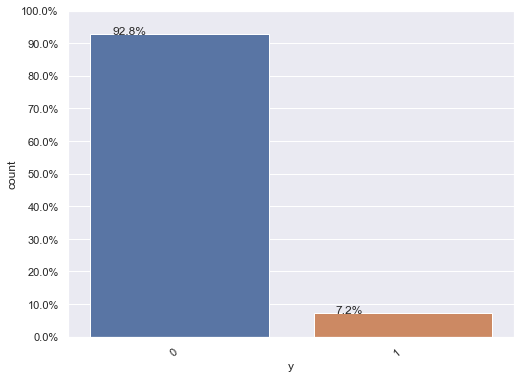

In [4]:
  plt.figure(figsize=(8,6))
  Y = data["y"]
  total = len(Y)*1.
  ax=sns.countplot(x="y", data=data)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  plt.show()

From the above graph we can see that data is unbalanced.

# Categorical analysis of variables

In [5]:
def countplot(label, dataset):
  plt.figure(figsize=(15,10))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
  
  ax.yaxis.set_ticks(np.linspace(0, total, 11)) 
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  plt.show()
    
%matplotlib inline

def countplot_withY(label, dataset):
  plt.figure(figsize=(20,10))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  plt.show()

# Numeric data with respect to age

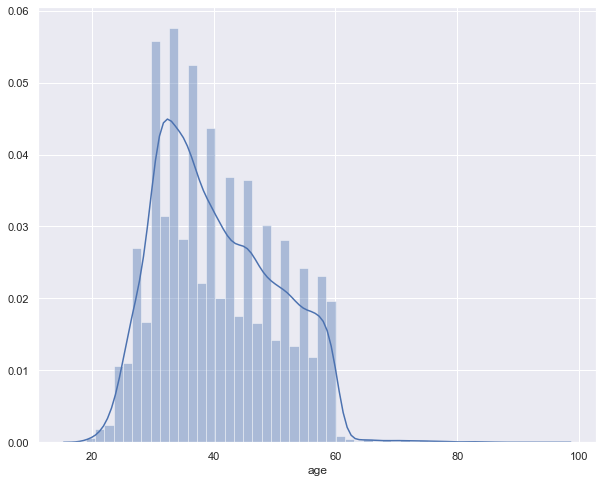

In [6]:
plt.figure(figsize=(10,8))
sns.distplot(data["age"])

From the above graph, We can say most of the customers are in the age of 30-40.

# Categorical data with respect to job (y is not included here yet)

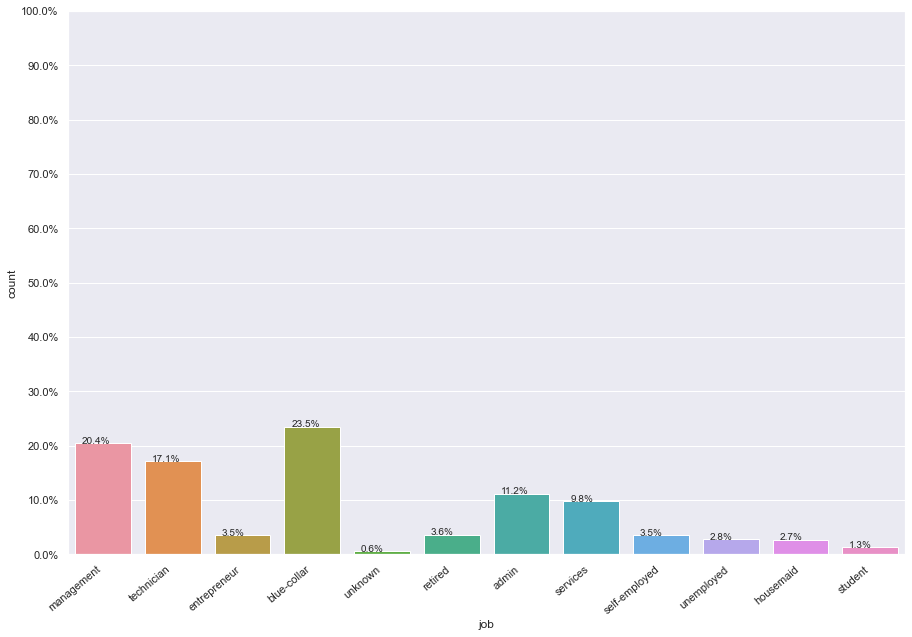

In [7]:
countplot("job", data)

From the above graph  we can see that blue-collar is the most common profession of the majority (dataset)

# Categorical data with respect to profession and investment rate(y)

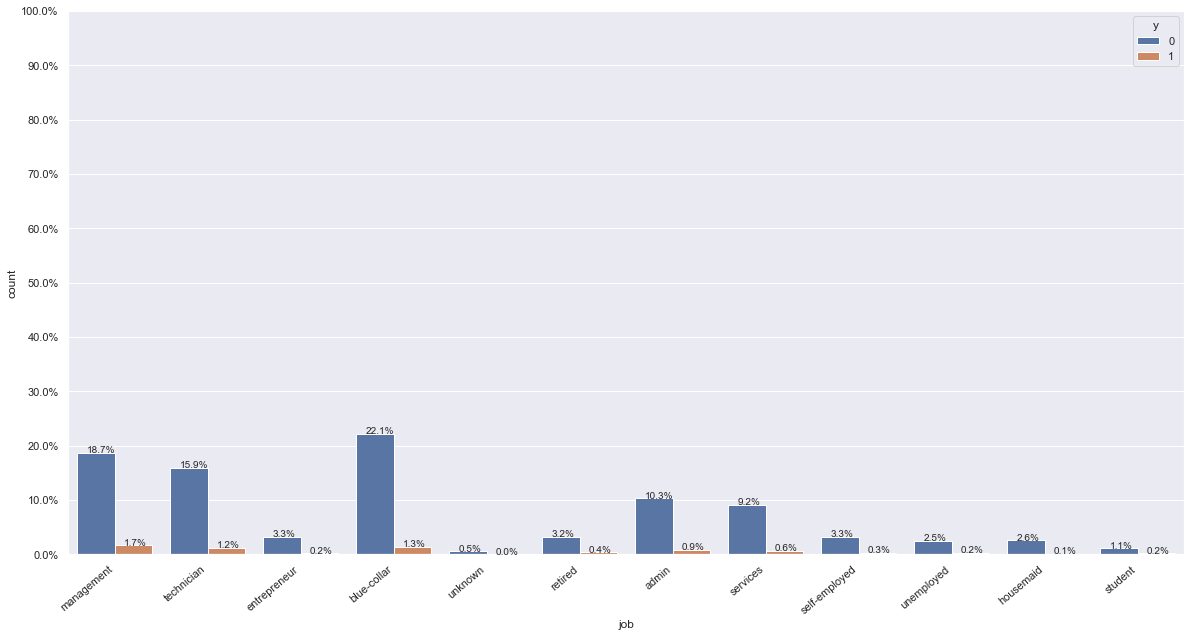

In [8]:
countplot_withY("job", data)

From the above graph we can see that people who work as admin, they have the highest investment rate (with respect to their population in dataset) but they also have the highest rate of not investing.

# Categorical data with respect to marital status

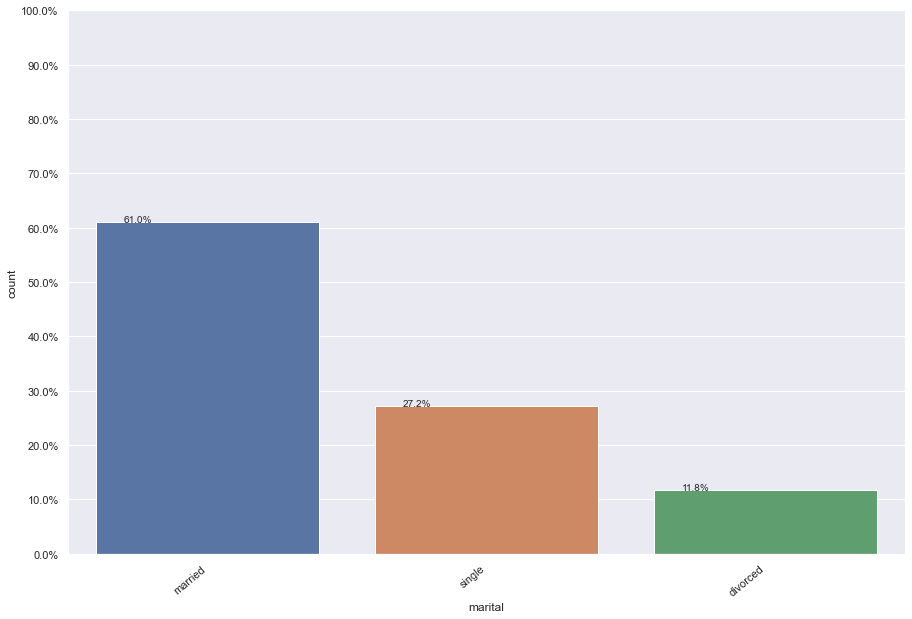

In [9]:
countplot("marital", data)

# Categorical data with respect to marital status and investment rate(y)

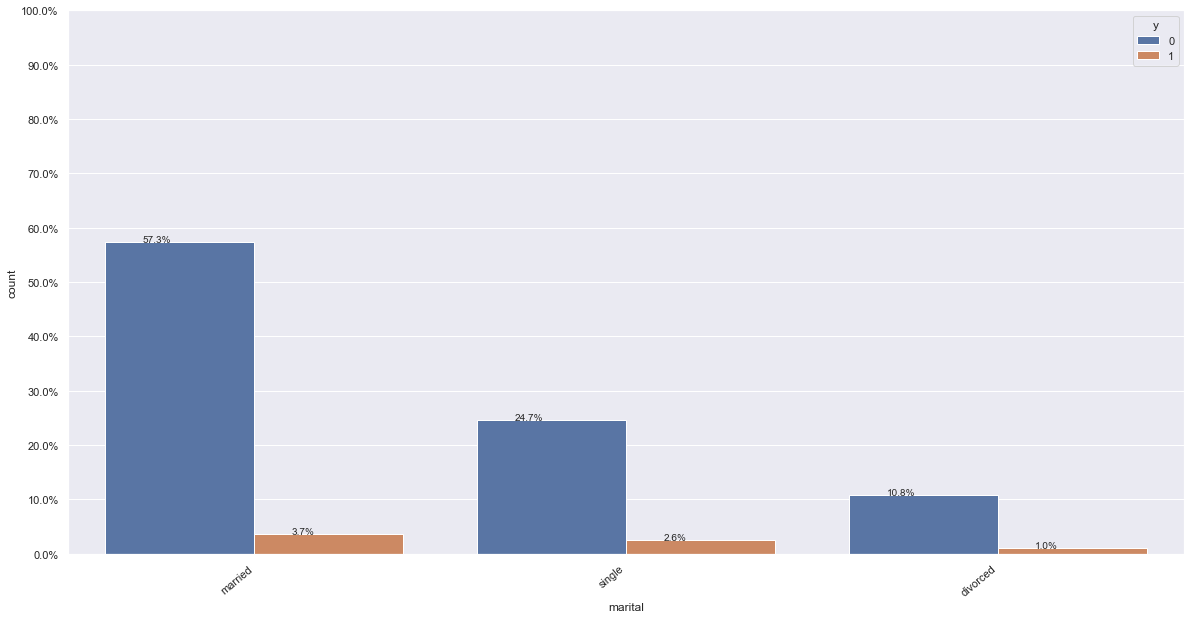

In [10]:
countplot_withY("marital", data)

# Categorical data with respect to education 

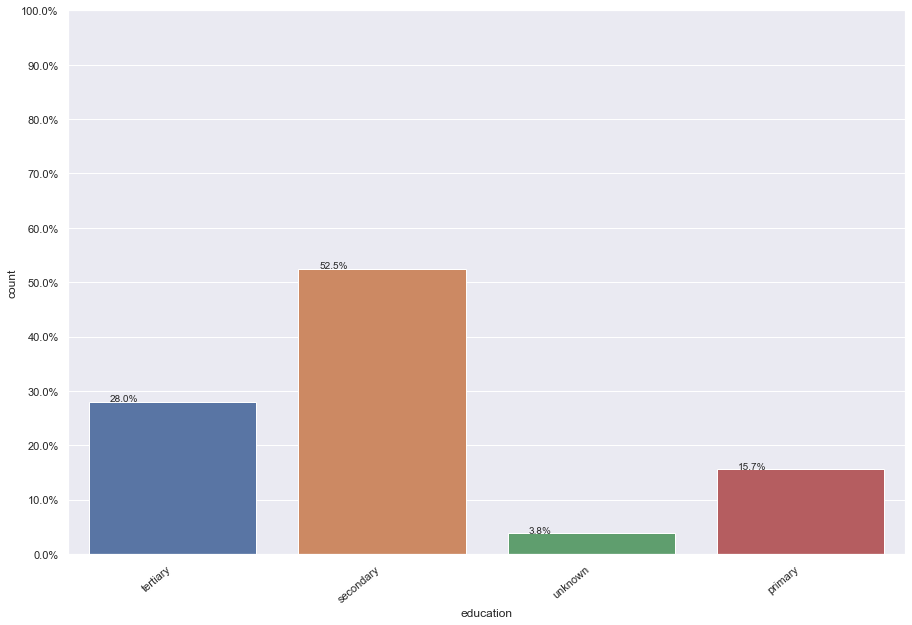

In [11]:
countplot("education",data)

# Categorical data with respect to education and investment rate(y)

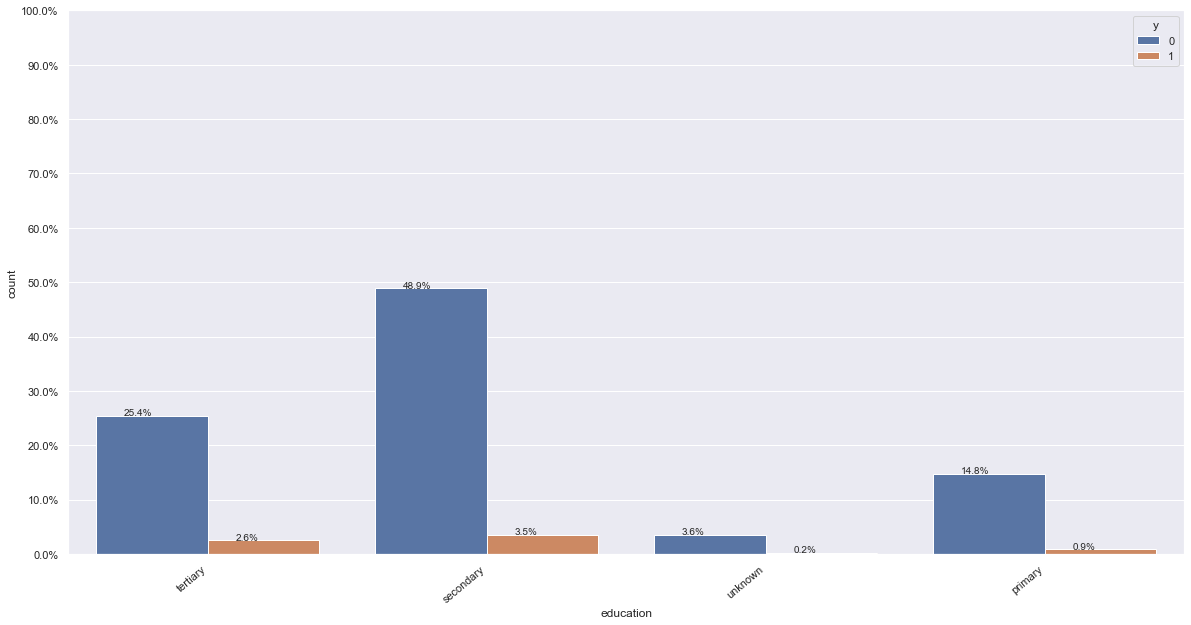

In [12]:
countplot_withY("education", data)

# Categorical data with respect to default variable(default loan)

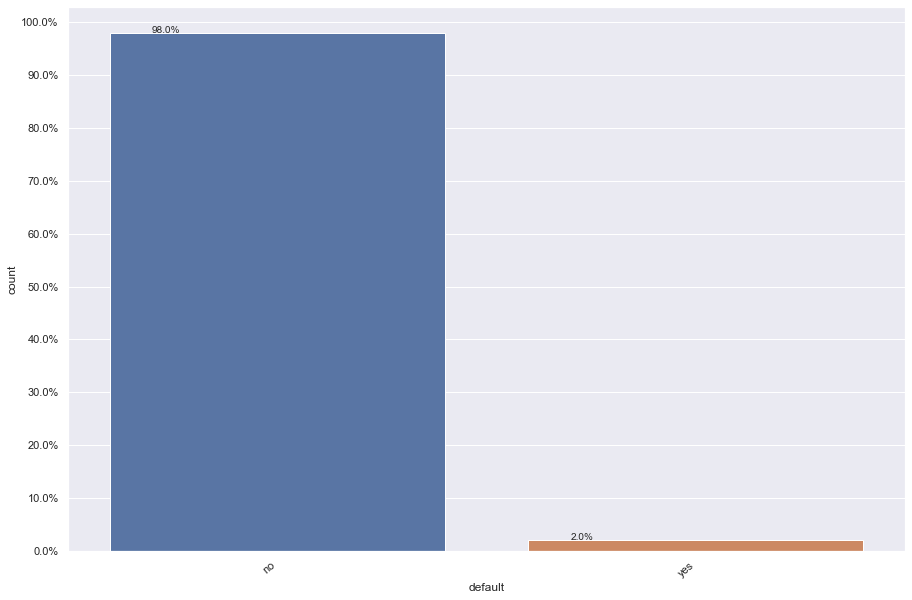

In [13]:
countplot("default", data)

# Categorical data with respect to default variable(default loan) and investment rate(y)

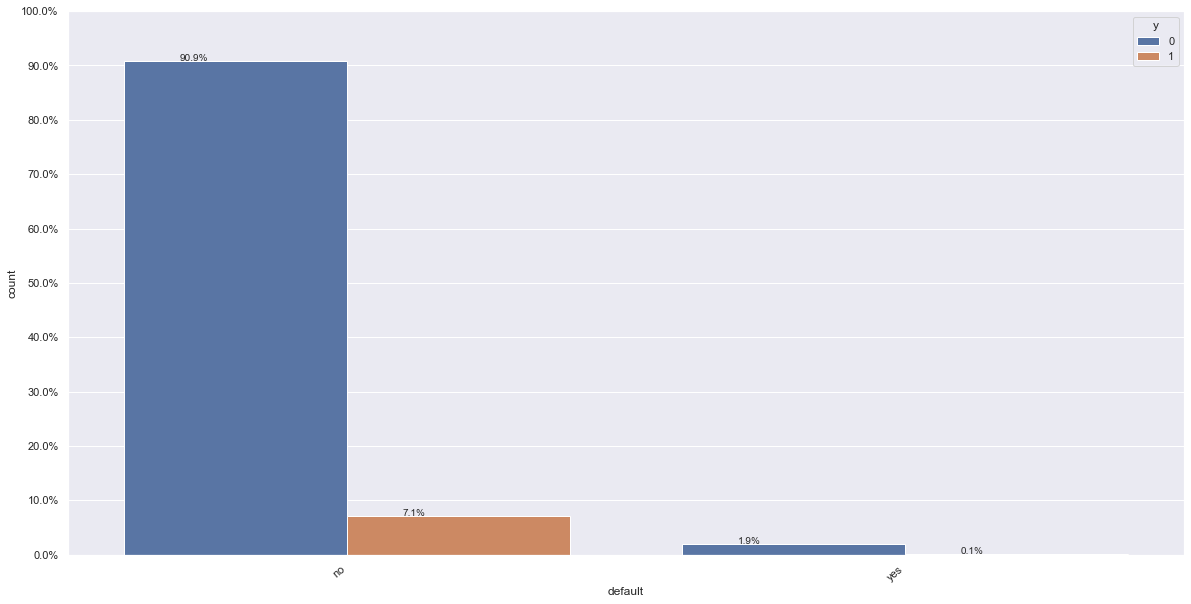

In [14]:
countplot_withY("default", data)

From the above graph we can say %1.9 people of customers has loan in default and %0.1 of these people has done the investment.

# Categorical data with respect to housing (loan) 

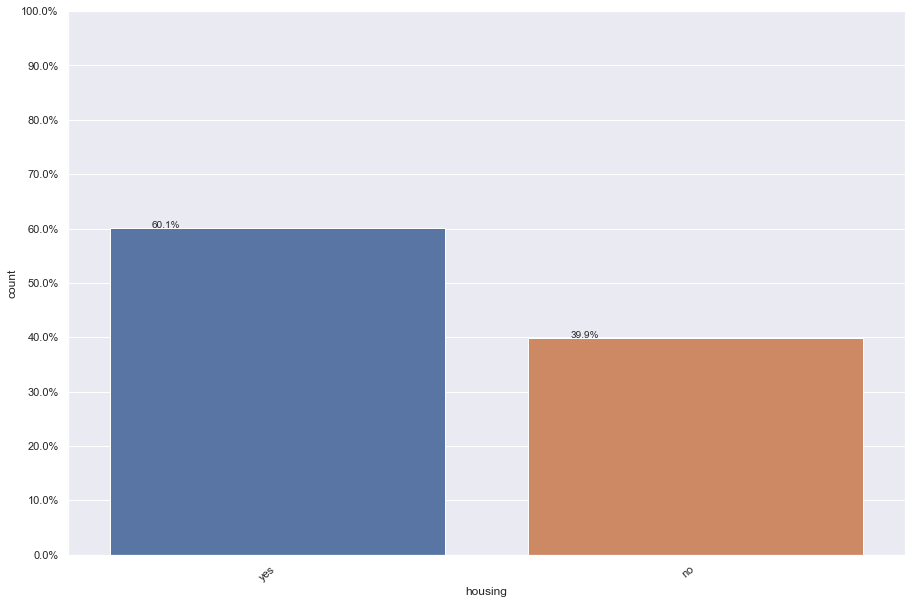

In [15]:
countplot("housing", data)

Majority of the customers have housing loan

# Categorical data with respect to housing(loan) and investment rate(y)

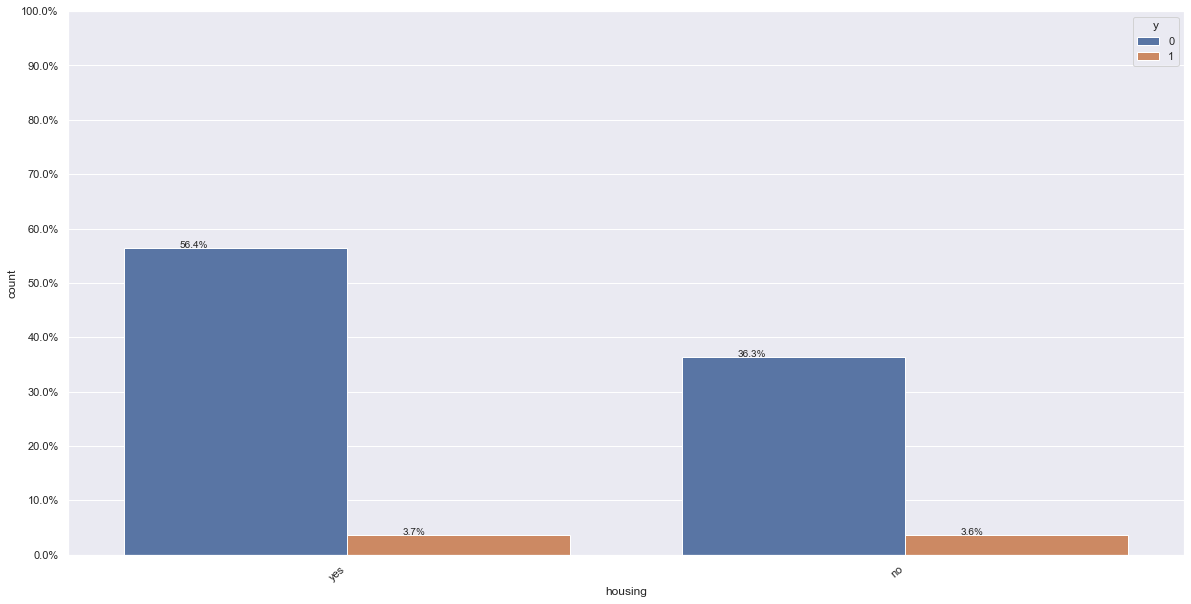

In [16]:
countplot_withY("housing", data)

From the above graph, We can say that customers who has no housing loans, have a higher investment rate

# Categorical data with respect to personal loan(binary)

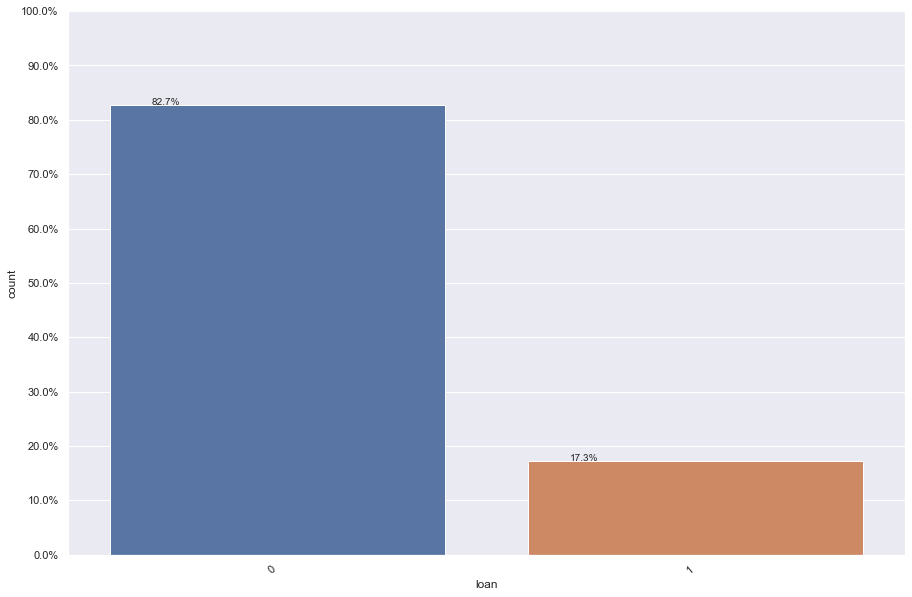

In [17]:
countplot("loan", data)

# Categorical data with respect to personal loan(binary) and investment rate(y)

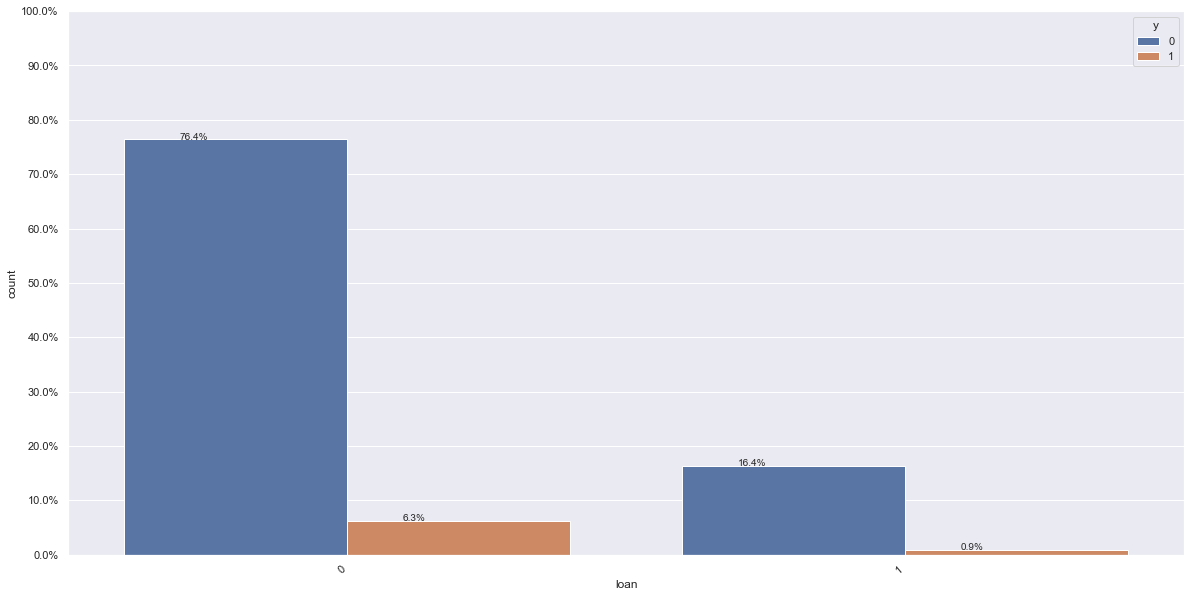

In [18]:
countplot_withY("loan", data)

From the above graph, We can say that people who has no personal loan more likely to do the investment.

# Categorical data with respect to contact type

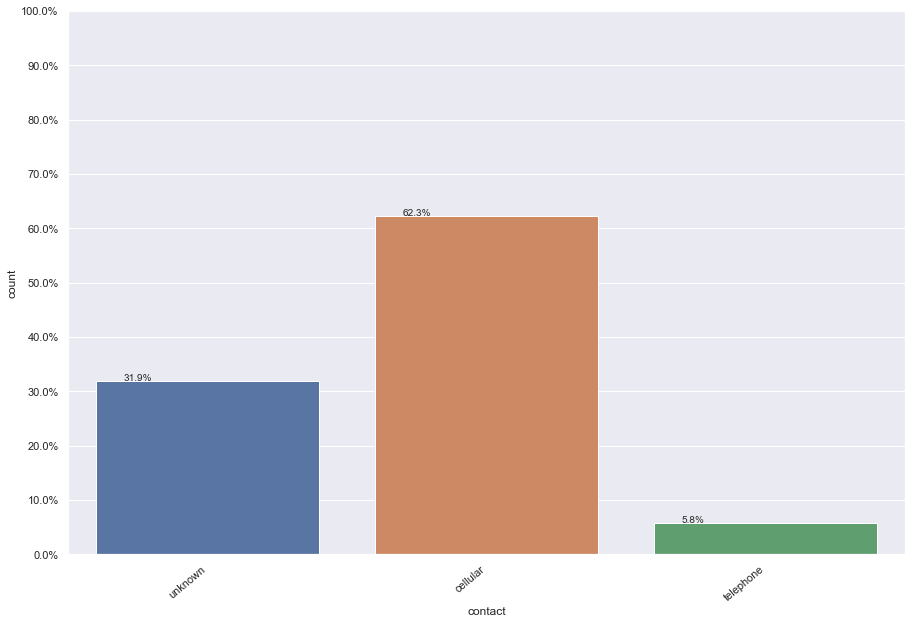

In [19]:
countplot("contact", data)

# Categorical data with respect to contact type and investment rate (y)

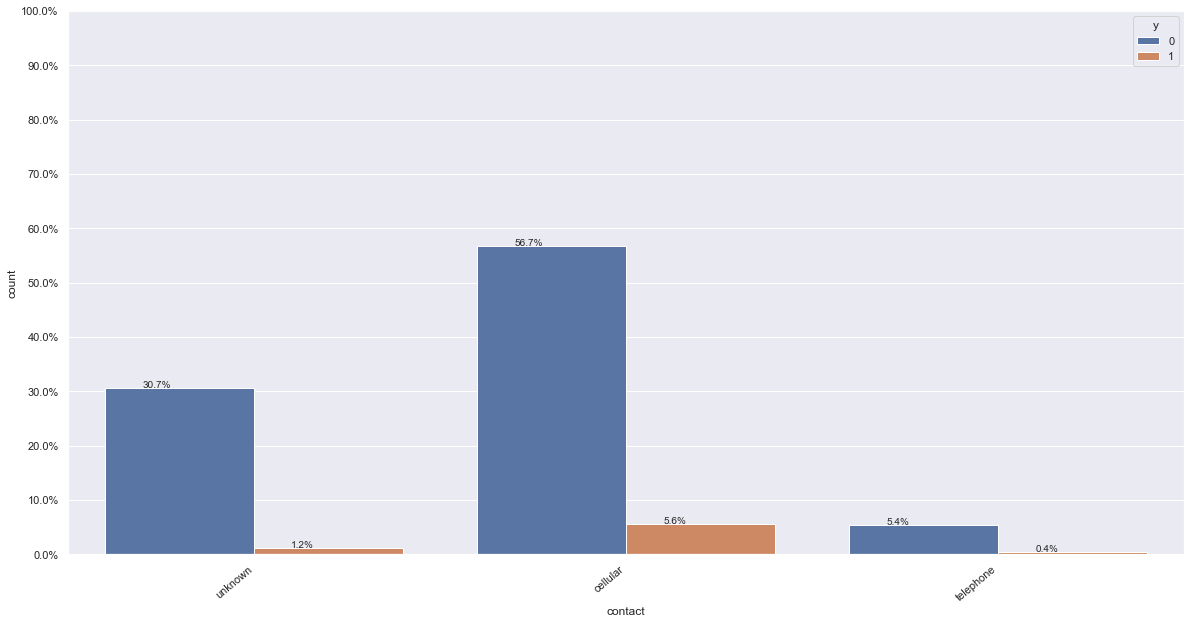

In [20]:
countplot_withY("contact", data)

# Categorical data with respect to month

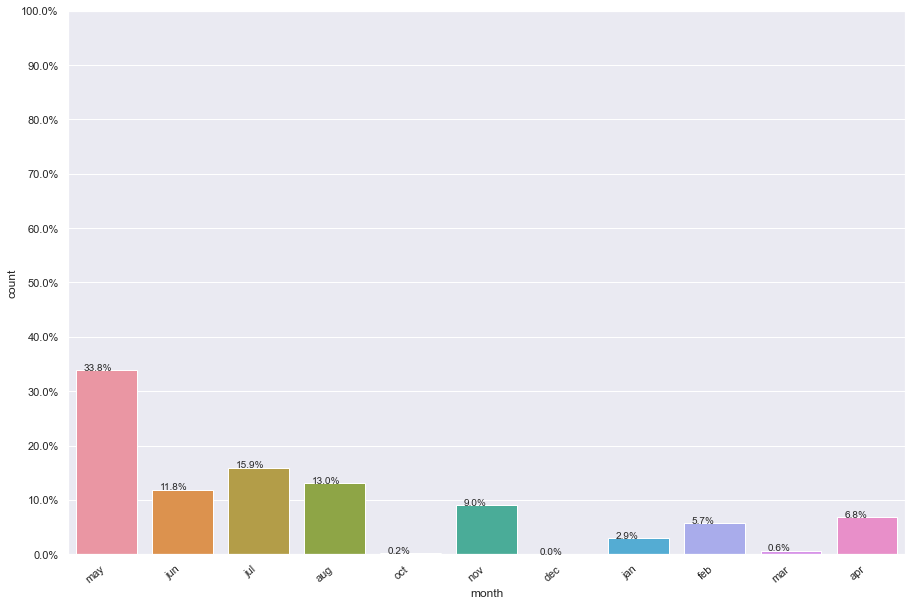

In [21]:
countplot("month", data)

# Categorical data with respect to month and investment rate(y) 

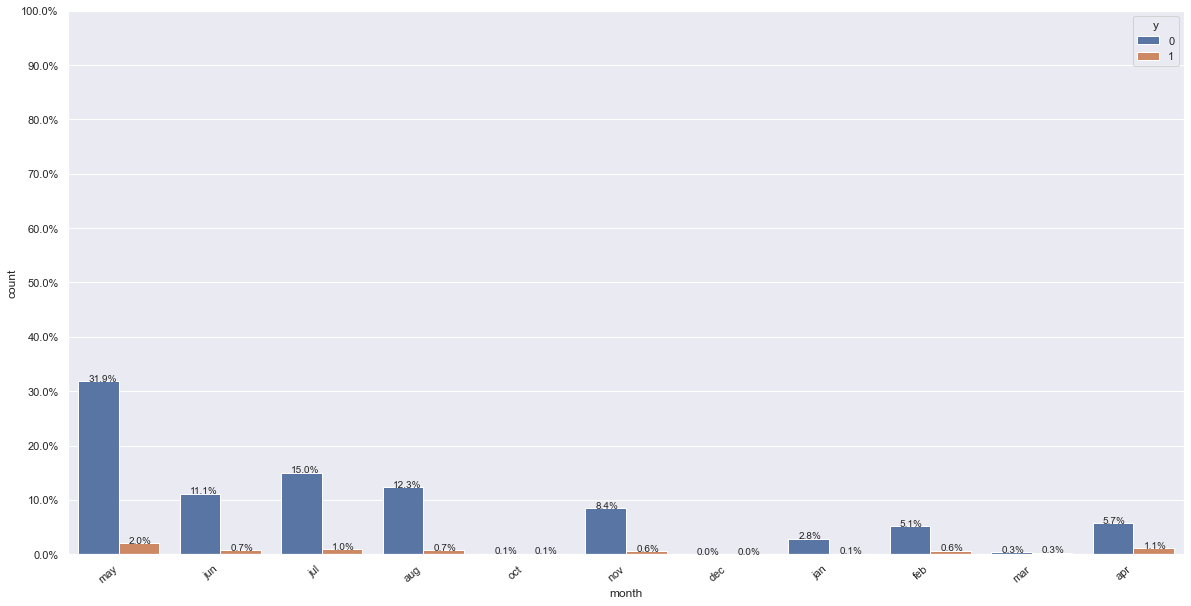

In [22]:
countplot_withY("month", data)

# Numerical data with respect to duration

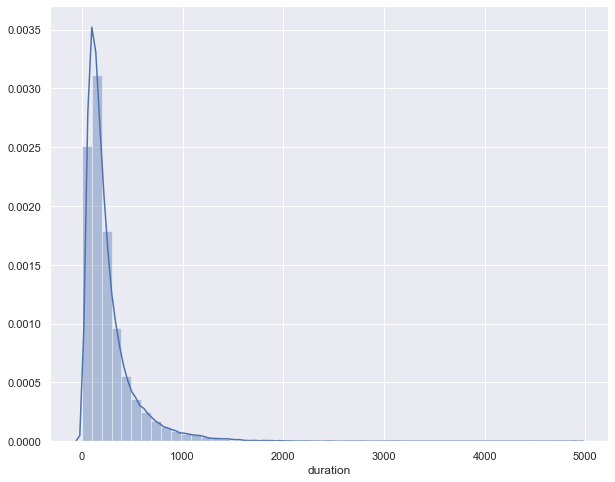

In [23]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["duration"])
plt.show()

From the above graph, We can say most of the phone calls were around 100-200 seconds long

# Numerical data with respect to campaign

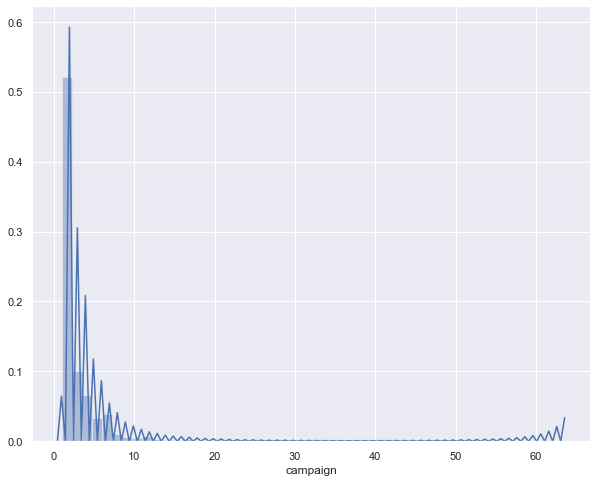

In [24]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["campaign"])
plt.show()

From the above graph, We can say number of contacts performed during this campaign and for this client was approximatelly once or twice

# DATA PREPROCESSING

In [25]:
data_dup = data[data.duplicated(keep="last")]
data_dup

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y


As We can see there is no duplicated data

# Seperate independent and target variables

In [26]:
data_x = data.iloc[:, :-1]
print("Shape of X:", data_x.shape)
data_y = data["y"]
print("Shape of Y:", data_y.shape)

Shape of X: (40000, 13)
Shape of Y: (40000,)


# Train test splits

In [27]:
from sklearn.model_selection import train_test_split

X_rest, X_test, y_rest, y_test = train_test_split(data_x, data_y, test_size=0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_rest, y_rest, test_size=0.2)

print("X Train:", X_train.shape)
print("X CV:", X_cv.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y CV:", y_cv.shape)
print("Y Test:", y_test.shape)


X Train: (25600, 13)
X CV: (6400, 13)
X Test: (8000, 13)
Y Train: (25600,)
Y CV: (6400,)
Y Test: (8000,)


# One hot encoding of categorical variables

In [28]:
categorical_feature_mask = data_x.dtypes==object
categorical_cols = data_x.columns[categorical_feature_mask].tolist()

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

def add_onehot_to_dataframe(sparse, df, vectorizer, name):
  '''
      This function will add the one hot encoded to the dataframe.

  '''
  for i, col in enumerate(vectorizer.get_feature_names()):
    colname = name+"_"+col
    # df[colname] = pd.SparseSeries(sparse[:, i].toarray().flatten(), fill_value=0)
    df[colname] = sparse[:, i].toarray().ravel().tolist()
  
  return df

def OneHotEncoder(categorical_cols, X_train, X_test, X_cv=None, include_cv=False):
  '''
    This function takes categorical column names as inputs. The objective
    of this function is to take the column names iteratively and encode the 
    features using One hot Encoding mechanism and also adding the encoded feature
    to the respective dataframe.

    The include_cv parameter indicates whether we should include CV dataset or not.
    This is added specifically because when using GridSearchCV or RandomizedSearchCV,
    we only split the dataset into train and test to give more data to training purposes.
    This is done because GridSearchCV splits the data internally anyway.
  '''

  for i in categorical_cols:
    Vectorizer = CountVectorizer(token_pattern="[A-Za-z0-9-.]+")
    print("Encoding for feature: ", i)
    # Encoding training dataset 
    temp_cols = Vectorizer.fit_transform(X_train[i])
    X_train = add_onehot_to_dataframe(temp_cols, X_train, Vectorizer, i)

    # Encoding Cross validation dataset
    if include_cv:
      temp_cols = Vectorizer.transform(X_cv[i])
      X_cv = add_onehot_to_dataframe(temp_cols, X_cv, Vectorizer, i)

    # Encoding Test dataset
    temp_cols = Vectorizer.transform(X_test[i])
    X_test = add_onehot_to_dataframe(temp_cols, X_test, Vectorizer, i)

In [30]:
OneHotEncoder(categorical_cols, X_train, X_test, X_cv, True)

X_train = X_train.drop(categorical_cols, axis=1)
X_cv = X_cv.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

print("Shape of train: ", X_train.shape)
print("Shape of CV: ", X_cv.shape)
print("Shape of test: ", X_test.shape)

Encoding for feature:  job


<ipython-input-29-6acfbba1fb90>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colname] = sparse[:, i].toarray().ravel().tolist()


Encoding for feature:  marital
Encoding for feature:  education
Encoding for feature:  default
Encoding for feature:  housing
Encoding for feature:  contact
Encoding for feature:  month
Shape of train:  (25600, 43)
Shape of CV:  (6400, 43)
Shape of test:  (8000, 43)


In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25600 entries, 8266 to 11519
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  25600 non-null  int64
 1   balance              25600 non-null  int64
 2   loan                 25600 non-null  int64
 3   day                  25600 non-null  int64
 4   duration             25600 non-null  int64
 5   campaign             25600 non-null  int64
 6   job_admin            25600 non-null  int64
 7   job_blue-collar      25600 non-null  int64
 8   job_entrepreneur     25600 non-null  int64
 9   job_housemaid        25600 non-null  int64
 10  job_management       25600 non-null  int64
 11  job_retired          25600 non-null  int64
 12  job_self-employed    25600 non-null  int64
 13  job_services         25600 non-null  int64
 14  job_student          25600 non-null  int64
 15  job_technician       25600 non-null  int64
 16  job_unemployed     

In [32]:
data_x.to_csv("encoded_data_x.csv")
data_y.to_csv("data_y.csv")

# Removing "Duration" feature

Duration: last contact duration, in seconds (numeric)

This feature highly effects the output target(y). Yet, the duration is not known before the call is made with customer 

In [33]:
X_train = X_train.drop("duration", axis=1)
print("The shape of the train dataset: ", X_train.shape)

X_cv = X_cv.drop("duration", axis=1)
print("The shape of the cv dataset: ", X_cv.shape)

X_test = X_test.drop("duration", axis=1)
print("The shape of the test dataset: ", X_test.shape)

The shape of the train dataset:  (25600, 42)
The shape of the cv dataset:  (6400, 42)
The shape of the test dataset:  (8000, 42)


# XGBoost with RandomizedSearchCV hyper parameter tuning

In [ ]:
x_cfl=XGBClassifier(tree_method='gpu_hist', max_bin=16)

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_iter=20, cv=5, scoring='roc_auc')
random_cfl.fit(X_train, y_train)
print (random_cfl.best_params_)

In [ ]:
x_cfl=XGBClassifier(n_estimators=2000,max_depth=3,learning_rate=0.01, \
                    colsample_bytree=0.5,subsample=1,tree_method='gpu_hist', max_bin=16)
x_cfl.fit(X_train,y_train,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ("For values of best alpha = 2000 The train AUC is:",roc_auc_score(y_train, predict_y[:, 1]))
predict_y = sig_clf.predict_proba(X_test)
print("For values of best alpha = 2000 The test AUC is:",roc_auc_score(y_test, predict_y[:, 1]))

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt; plt.rcdefaults()
feature_importance = x_cfl.get_booster().get_score(importance_type='gain')

objects = feature_importance.keys()
y_pos = np.arange(len(objects))
performance = feature_importance.values()
plt.figure(figsize=(8,20))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Graph')
plt.show()

# CONCLUSION

With the given properties, We have hit a significant AUC score. If we want to improve the score, We must be given more specific feature of the dataset.

# Bonus section

Since We are interested in finding customers who are more likely to buy the investment product, when we analyse the graphs evaluated from the given dataset, We can see the the people who work as admin, has no loan (deafult or housing), and single are the people who are most likely to buy the investment product, so that they must be prioritized.

When We check the Feature Importance Graph, We can see that, the people who has no loan(housing and personal) and has no default credit are more likely to buy the investment product. So that in future we must focus on such people so as to make a better campaign and get more clients.